<a href="https://colab.research.google.com/github/Nellyssc/ml/blob/main/unet0_6_floods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Colab!


## Access Popular LLMs via Google-Colab-AI Without an API Key
Users with Colab's paid plans have free access to most popular LLMs via google-colab-ai Python library. For more details, refer to the [getting started with google colab ai](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Getting_started_with_google_colab_ai.ipynb).

```
from google.colab import ai
response = ai.generate_text("What is the capital of France?")
print(response)
```


## Explore the Gemini API
The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.

**How to get started?**
*  Go to [Google AI Studio](https://aistudio.google.com/) and log in with your Google account.
*  [Create an API key](https://aistudio.google.com/app/apikey).
* Use a quickstart for [Python](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb), or call the REST API using [curl](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb).

**Discover Gemini's advanced capabilities**
*  Play with Gemini [multimodal outputs](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Image-out.ipynb), mixing text and images in an iterative way.
*  Discover the [multimodal Live API](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_LiveAPI.ipynb ) (demo [here](https://aistudio.google.com/live)).
*  Learn how to [analyze images and detect items in your pictures](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Spatial_understanding.ipynb") using Gemini (bonus, there's a [3D version](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Spatial_understanding_3d.ipynb) as well!).
*  Unlock the power of [Gemini thinking model](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb), capable of solving complex task with its inner thoughts.
      
**Explore complex use cases**
*  Use [Gemini grounding capabilities](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Search_grounding_for_research_report.ipynb) to create a report on a company based on what the model can find on internet.
*  Extract [invoices and form data from PDF](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Pdf_structured_outputs_on_invoices_and_forms.ipynb) in a structured way.
*  Create [illustrations based on a whole book](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Book_illustration.ipynb) using Gemini large context window and Imagen.

To learn more, check out the [Gemini cookbook](https://github.com/google-gemini/cookbook) or visit the [Gemini API documentation](https://ai.google.dev/docs/).


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import numpy as np
from PIL import Image
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint



In [ ]:
os.chdir('/content/drive/MyDrive/floods')

In [ ]:
pwd

'/content/drive/MyDrive/floods'

In [ ]:
def load_and_preprocess_images(Image_paths, Image_size=(512, 512), is_mask=False):
    Images_array = []
    for Img_path in Image_paths:
        Img = Image.open(Img_path)

        # Ensure consistent image modes
        if is_mask:
            Img = Img.convert('L')  # Grayscale for masks
        else:
            Img = Img.convert('RGB')  # RGB for images

        # Resize images
        Img = Img.resize(image_size)

        # Convert to numpy array
        Img_array = np.array(img)

        # Normalize images
        if not is_mask:
            Img_array = Img_array / 255.0  # Normalize images to [0, 1]
        else:
            # Convert masks to binary
            Img_array = Img_array / 255.0
            Img_array = (Img_array > 0.5).astype(np.float32)
            Img_array = np.expand_dims(Img_array, axis=-1)  # Add channel dimension

        Images_array.append(Img_array)

    Images_array = np.array(Images_array)
    return Images_array

In [ ]:
project_path = '/content/drive/MyDrive/floods'

In [ ]:
all_image_paths = sorted(glob.glob(os.path.join(project_path, 'Image/*.jpg')))
# Get mask paths from the 'Mask' folder with matching names (.jpg → .png)
all_mask_paths = [os.path.join(project_path, 'Mask', os.path.basename(img_path).replace('.jpg', '.png'))
                 for img_path in all_image_paths]

# Print found paths
print(f"Number of image paths found: {len(all_image_paths)}")
print(f"Number of mask paths found: {len(all_mask_paths)}")

Number of image paths found: 290
Number of mask paths found: 290


In [ ]:
if all_image_paths:
    # Split into training and testing sets (60% train, 40% test)
    train_img, test_img, train_mask, test_mask = train_test_split(
        all_image_paths,
        all_mask_paths,
        test_size=0.4,
        random_state=7
    )

In [ ]:
print("\nDataset split successful!")
print(f"Training images: {len(train_img)}")
print(f"Testing images: {len(test_img)}")
print(f"Training masks: {len(train_mask)}")
print(f"Testing masks: {len(test_mask)}")



Dataset split successful!
Training images: 174
Testing images: 116
Training masks: 174
Testing masks: 116


In [ ]:
def load_and_preprocess_images(image_paths, image_size=(512, 512), is_mask=False):
        images_array = []
        for img_path in image_paths:
            img = Image.open(img_path)

            if is_mask:
                img = img.convert('L')  # Grayscale for masks
            else:
                img = img.convert('RGB')  # RGB for images

            img = img.resize(image_size)
            img_array = np.array(img)

            if not is_mask:
                img_array = img_array / 255.0  # Normalize images
            else:
                img_array = img_array / 255.0
                img_array = (img_array > 0.5).astype(np.float32)
                img_array = np.expand_dims(img_array, axis=-1)  # Add channel dimension

            images_array.append(img_array)

        return np.array(images_array)

In [ ]:
train_x = load_and_preprocess_images(train_img, image_size=(512, 512), is_mask=False)
print("Loading training masks...")
train_y = load_and_preprocess_images(train_mask, image_size=(512, 512), is_mask=True)
print("Loading test images...")
test_x = load_and_preprocess_images(test_img, image_size=(512, 512), is_mask=False)
print("Loading test masks...")
test_y = load_and_preprocess_images(test_mask, image_size=(512, 512), is_mask=True)

Loading training masks...
Loading test images...
Loading test masks...


In [ ]:
print(f"Training images shape: {train_x.shape}")
print(f"Training masks shape: {train_y.shape}")
print(f"Testing images shape: {test_x.shape}")
print(f"Testing masks shape: {test_y.shape}")

Training images shape: (174, 512, 512, 3)
Training masks shape: (174, 512, 512, 1)
Testing images shape: (116, 512, 512, 3)
Testing masks shape: (116, 512, 512, 1)


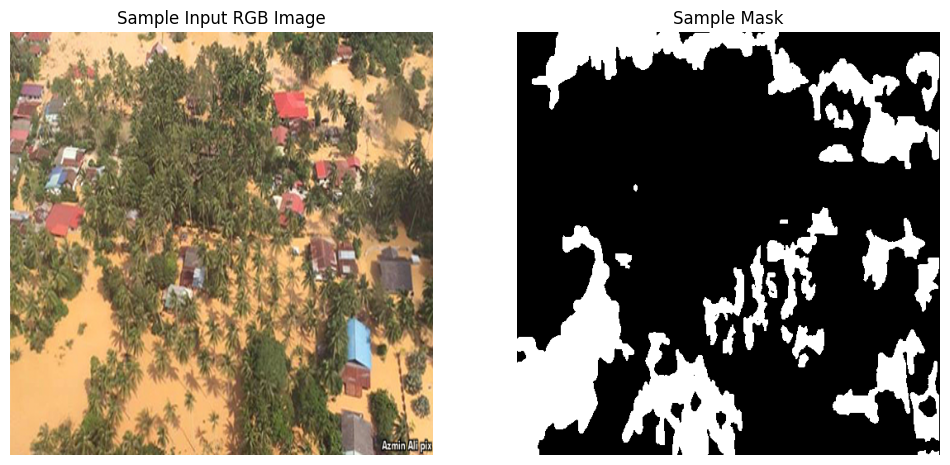

In [ ]:
index = 1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(train_x[index])
plt.title('Sample Input RGB Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(train_y[index].squeeze(), cmap='gray')
plt.title('Sample Mask')
plt.axis('off')

plt.show()

In [ ]:
# Define the IoU metric
def iou_metric(y_true, y_pred):
    y_pred = tf.cast(y_pred > 0.5, tf.float32)
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection
    return intersection / (union + 1e-7)


In [ ]:
def unet_model(input_size=(512, 512, 3)):
    x_in = Input(shape=input_size)

    # Encoder
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x_in)
    x1 = Dropout(0.1)(x1)
    x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
    p1 = MaxPooling2D((2, 2))(x1)

    x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    x2 = Dropout(0.1)(x2)
    x2 = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
    p2 = MaxPooling2D((2, 2))(x2)

    x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    x3 = Dropout(0.2)(x3)
    x3 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
    p3 = MaxPooling2D((2, 2))(x3)

    x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    x4 = Dropout(0.2)(x4)
    x4 = Conv2D(256, (3, 3), activation='relu', padding='same')(x4)

    # Decoder
    u1 = Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(x4)
    u1 = Concatenate()([u1, x3])
    u1 = Dropout(0.2)(u1)
    u1 = Conv2D(128, (3, 3), activation='relu', padding='same')(u1)

    u2 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(u1)
    u2 = Concatenate()([u2, x2])
    u2 = Dropout(0.2)(u2)
    u2 = Conv2D(64, (3, 3), activation='relu', padding='same')(u2)

    u3 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(u2)
    u3 = Concatenate()([u3, x1])
    u3 = Dropout(0.1)(u3)
    u3 = Conv2D(32, (3, 3), activation='relu', padding='same')(u3)

    # Output
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(u3)

    model = Model(inputs=x_in, outputs=outputs)
    return model


In [ ]:
# Instantiate the model
model = unet_model(input_size=(512, 512, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', iou_metric])

# Display the model's architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512, 512,  │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │      9,248 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 256, 256,  │          0 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │     36,928 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │    147,584 │ dropout_2[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_6[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │    590,080 │ dropout_3[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 128, 128,  │    295,040 │ conv2d_7[0][0]  

 Total params: 1,946,881 (7.43 MB)

 Trainable params: 1,946,881 (7.43 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopper = EarlyStopping(patience=20, verbose=1, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-5, verbose=1)
checkpoint = ModelCheckpoint('unet_best_model.keras', verbose=1, save_best_only=True)

In [ ]:
# Optional: Data augmentation using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation parameters
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')

# Create ImageDataGenerators
image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the flow methods
seed = 1
batch_size = 10

image_generator = image_datagen.flow(train_x, batch_size=batch_size, seed=seed)
mask_generator = mask_datagen.flow(train_y, batch_size=batch_size, seed=seed)

# Define the combined generator using next()
def combined_generator(image_gen, mask_gen):
    while True:
        X = next(image_gen)
        Y = next(mask_gen)
        yield X, Y

In [ ]:
# Calculate steps per epoch
steps_per_epoch = len(train_x) // batch_size

# Train the model
history = model.fit(combined_generator(image_generator, mask_generator),
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(test_x, test_y),
                    epochs=100,
                    callbacks=[early_stopper, reduce_lr, checkpoint])

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 858ms/step - accuracy: 0.8489 - iou_metric: 0.6941 - loss: 0.3470
Epoch 1: val_loss improved from inf to 0.36086, saving model to unet_best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8492 - iou_metric: 0.6946 - loss: 0.3462 - val_accuracy: 0.8536 - val_iou_metric: 0.6984 - val_loss: 0.3609 - learning_rate: 1.0000e-05
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 898ms/step - accuracy: 0.8599 - iou_metric: 0.7297 - loss: 0.3116
Epoch 2: val_loss did not improve from 0.36086
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.8596 - iou_metric: 0.7284 - loss: 0.3126 - val_accuracy: 0.8529 - val_iou_metric: 0.6979 - val_loss: 0.3622 - learning_rate: 1.0000e-05
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.8598 - iou_metric: 0.7183 - loss: 0.3222
Epoch 3: val_loss did not improve from 0.36086
17/17 ━━━━━━━━━━━━━━━━━━━━ 16s 938ms/step - accuracy: 0.8595 - iou_metric: 0.7177 - loss: 0.3226 - val_accuracy: 0.852

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - accuracy: 0.8488 - iou_metric: 0.6831 - loss: 0.3709
Test Loss: 0.3587450087070465
Test Accuracy: 0.8543543219566345
Test IoU: 0.699861466884613


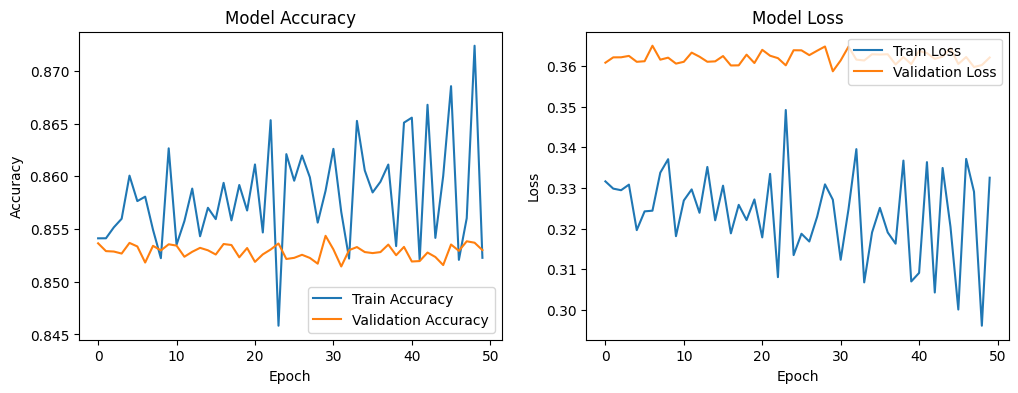

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_iou = model.evaluate(test_x, test_y)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test IoU: {test_iou}")

# Plot training & validation accuracy and loss values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

In [ ]:
# Save the trained model
model.save('unet_model.h5')

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 668ms/step


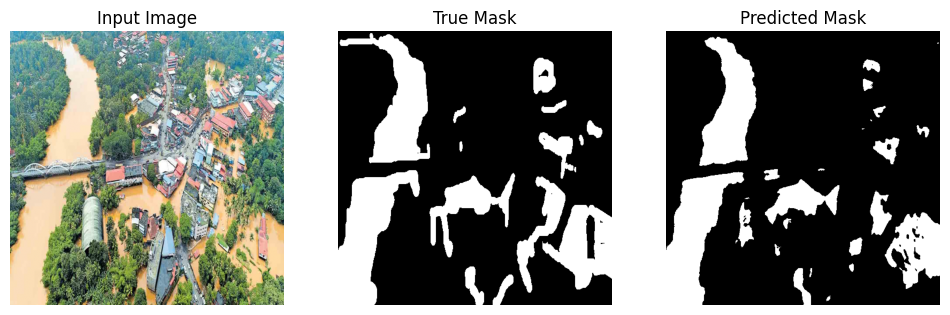

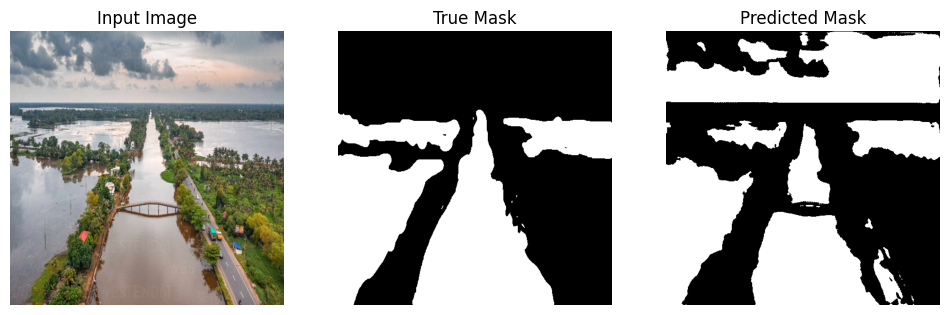

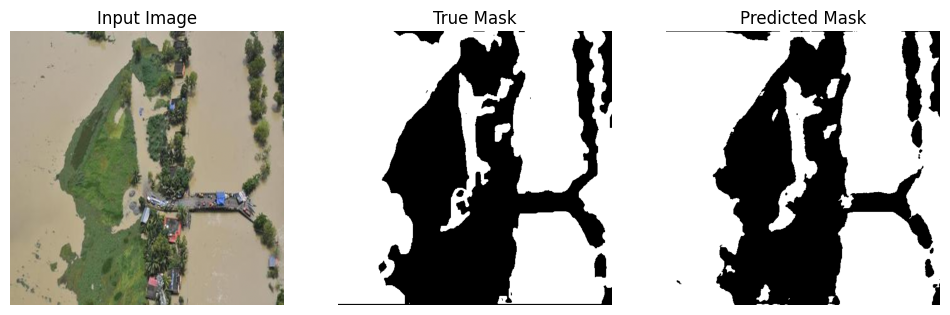

In [ ]:
# Predict on test data
preds = model.predict(test_x)
preds_thresholded = (preds > 0.5).astype(np.uint8)

# Visualize some predictions
import random

num_examples = 3
indices = random.sample(range(len(test_x)), num_examples)

for idx in indices:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(test_x[idx])
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(test_y[idx].squeeze(), cmap='gray')
    plt.title('True Mask')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(preds_thresholded[idx].squeeze(), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

    plt.show()

In [ ]:
# Print the layer names
for layer in model.layers:
    print(layer.name)

input_layer
conv2d
dropout
conv2d_1
max_pooling2d
conv2d_2
dropout_1
conv2d_3
max_pooling2d_1
conv2d_4
dropout_2
conv2d_5
max_pooling2d_2
conv2d_6
dropout_3
conv2d_7
conv2d_transpose
concatenate
dropout_4
conv2d_8
conv2d_transpose_1
concatenate_1
dropout_5
conv2d_9
conv2d_transpose_2
concatenate_2
dropout_6
conv2d_10
conv2d_11


In [ ]:
# Import the necessary libraries.
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Load the U-Net model (include custom_objects if necessary)
model_unet = load_model('unet_model.h5', custom_objects={'iou_metric': iou_metric})

def generate_layer_gradcam(model, img_array, layer_name, target_class=0):
    # Get the output of the target layer
    target_layer = model.get_layer(layer_name).output
    grad_cam_model = tf.keras.models.Model(inputs=model.input, outputs=[target_layer, model.output])

    with tf.GradientTape() as tape:
        # Forward pass
        last_conv_output, model_output = grad_cam_model(img_array)
        if isinstance(model_output, list):
            model_output = model_output[0]
        # Compute the loss with respect to the target class
        class_output = tf.reduce_mean(model_output[:, :, :, target_class])

    # Compute the gradient of the class output with respect to the feature map
    grads = tape.gradient(class_output, last_conv_output)
    # Global average pooling to get importance weights
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # Multiply each channel in the feature map by "how important this channel is" with respect to the target class
    last_conv_output = last_conv_output[0]
    heatmap = last_conv_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0) / (np.max(heatmap) + 1e-8)
    # Resize heatmap to match the input image size
    heatmap_resized = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))
    heatmap_colormap = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    img_array_uint8 = np.uint8(255 * img_array[0] * 255)
    gradcam_result = cv2.addWeighted(img_array_uint8, 0.6, heatmap_colormap, 0.4, 0)

    return gradcam_result, heatmap_resized

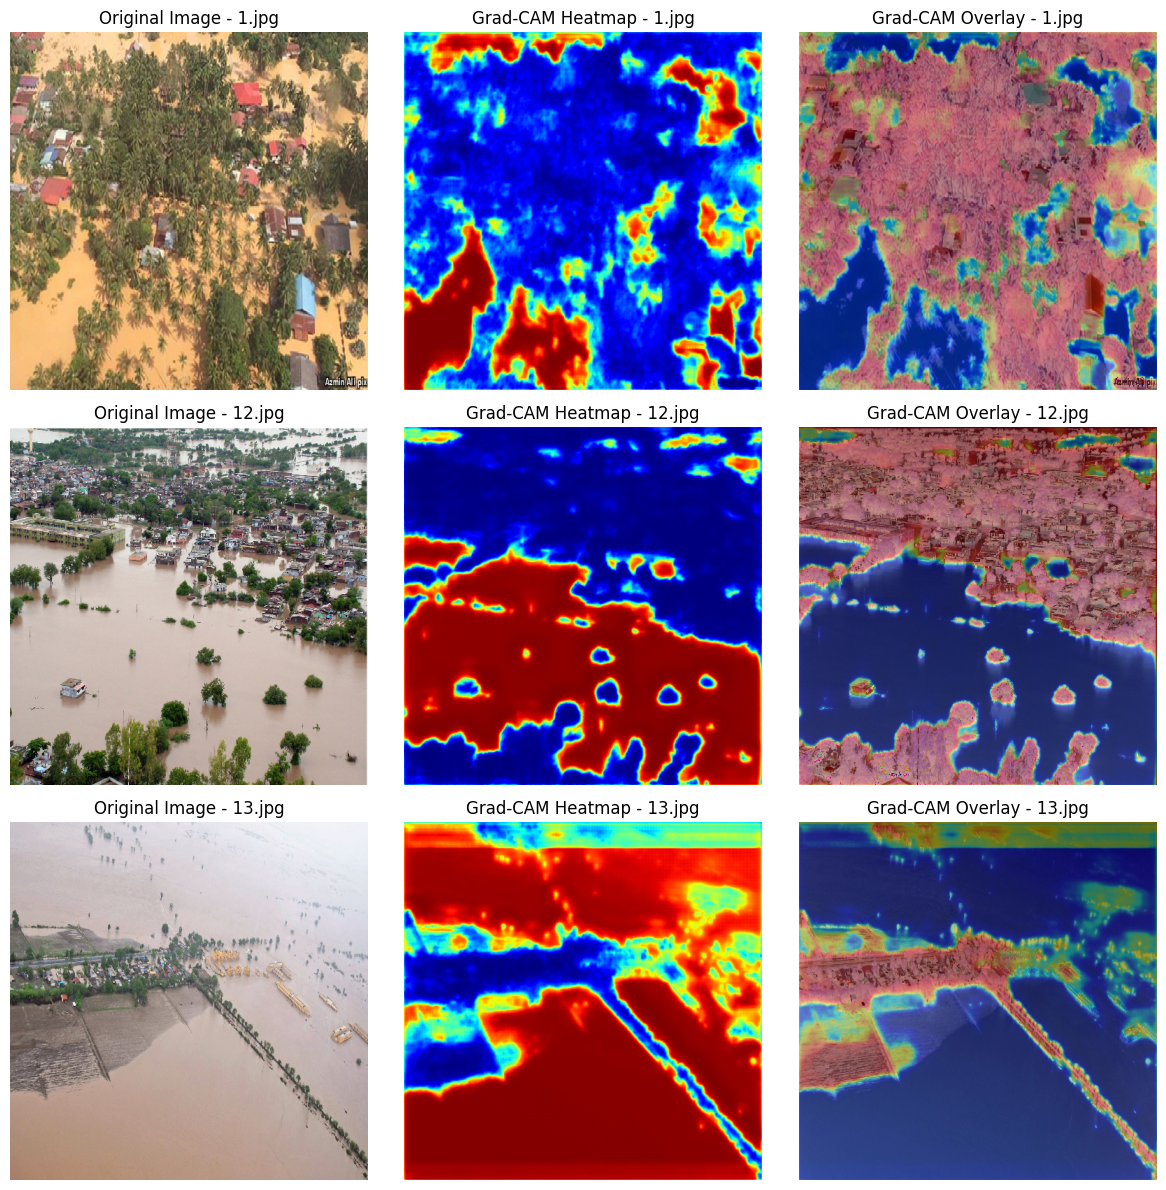

In [ ]:
# Directory containing images
img_path = '/content/drive/MyDrive/floods/Image'
image_filenames = ['1.jpg', '12.jpg', '13.jpg']
full_image_paths = [os.path.join(img_path, filename) for filename in image_filenames]

plt.figure(figsize=(12, 12))

for i, file_path in enumerate(full_image_paths):
    original_img = load_img(file_path, target_size=(512, 512))
    img_array = img_to_array(original_img)
    # Normalize the image
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    gradcam_result, heatmap_resized = generate_layer_gradcam(model_unet, img_array, "conv2d_11", 0)

    plt.subplot(len(image_filenames), 3, 3 * i + 1)
    plt.imshow(original_img)
    plt.title("Original Image - " + image_filenames[i])
    plt.axis('off')

    plt.subplot(len(image_filenames), 3, 3 * i + 2)
    plt.imshow(heatmap_resized, cmap='jet')
    plt.title("Grad-CAM Heatmap - " + image_filenames[i])
    plt.axis('off')

    plt.subplot(len(image_filenames), 3, 3 * i + 3)
    plt.imshow(gradcam_result)
    plt.title("Grad-CAM Overlay - " + image_filenames[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

Colab now has AI features powered by [Gemini](https://gemini.google.com). The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  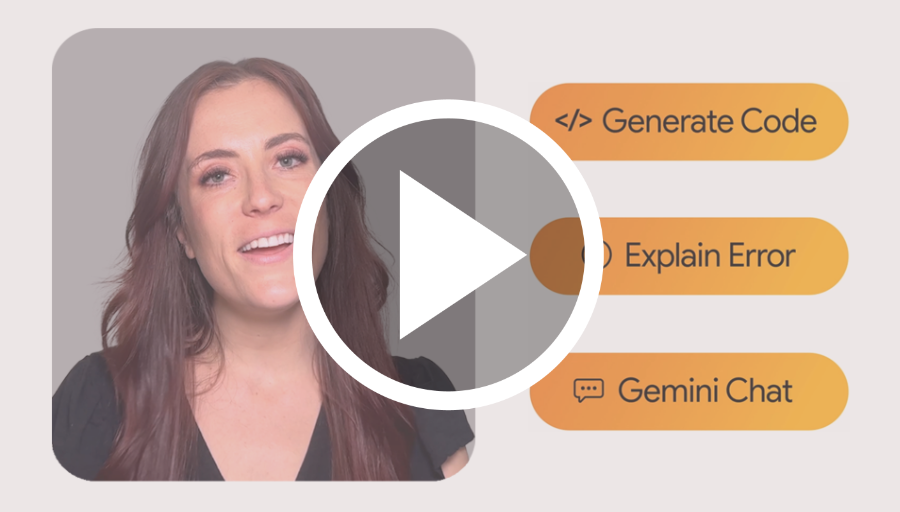
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

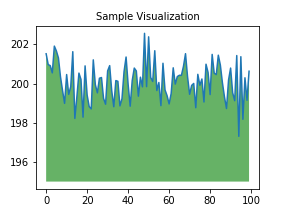

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning

<div>

These are a few of the notebooks related to Machine Learning, including Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Getting Started with cuML's accelerator mode](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cuml_sklearn_colab_demo.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TPUs in Colab](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
